In [1]:
import numpy as np
from scipy.fft import fft2,ifft2,fftfreq,fftshift,ifftshift
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [2]:
def Optica(U0,X,Y,z,lamb):
    A = (fft2((U0)))
    Lx = np.max(X)
    Ly= np.max(Y)

    deltax = 2*Lx/len(U0)
    deltay = 2*Ly/len(U0)    


    fx = ( fftfreq(len(U0),deltax) )  
    fy = ( fftfreq(len(U0),deltay) )   
        
    Fx,Fy = np.meshgrid(fx,fy)
    K = 2*np.pi/lamb

    # Handle cases where u is negative
    u = K**2-(2*np.pi*Fx)**2-(2*np.pi*Fy)**2
    sqrt_u = 1j*z*np.sqrt(abs(u))
    sqrt_u[np.where(u<0)] = 1j*sqrt_u[np.where(u<0)]

    return  ( ifft2( ( A*np.exp(sqrt_u) ) ) )

In [5]:
def FiguraOptica2(U0,X,Y,lamb,z):
  Z=[]
  for i in range(len(z)):
    U = Optica(U0,X,Y,z[i],lamb)
    Z.append(abs(U[len(U0)//2])**2)
  return Z

def FiguraOpticaH(U0,X,Y,lamb,L,z):
  A= U0[0]
  ZX,ZY,ZD=[],[],[]

  for i in range(len(L)):
    A =  Optica(A*U0[i],X,Y,L[i],lamb)
    uu = A.copy()
    uu[U0[i]== 0]= 1
    uu[U0[i]!= 0] = abs(uu[U0[i]!=0])**2
    ZX.append(abs(uu[len(uu)//2])**2)
    ZX.append(abs(uu[Y==0])**2)
    ZD.append(abs(uu[Y==X])**2)
    for j in range( int(L[i]//abs(z[0]-z[1])) ):
      a = Optica(A,X,Y,abs(z[0]-z[1])/(L[i]),lamb )
      ZX.append( abs(a[len(a)//2])**2 )
      ZY.append( abs(np.transpose(a)[len(a)//2])**2 )
      ZD.append( abs(a[X==Y])**2 )

  
  for i in range(len(z)):
    U = Optica(A*U0[-1],X,Y,z[i],lamb)
    if i==0:
      uu = U.copy()
      uu[U0[-1]== 0]= 1
      uu[U0[-1]!= 0] = abs(uu[U0[-1]!=0])**2
      ZX.append(abs(uu[len(uu)//2])**2)
      ZX.append(abs(uu[Y==0])**2)
      ZD.append(abs(uu[Y==X])**2)
    if i!=0:
      ZX.append(abs(U[len(U[0])//2])**2)
      ZY.append(abs(np.transpose(U)[len(U[0])//2])**2)
      ZD.append( abs(U[X==Y])**2 )
  return ZX,ZY,ZD

In [6]:
N = 3100
R= 8
x = np.linspace(-9*R,9*R,N,endpoint=False)
X,Y = np.meshgrid(x,x)

A0 = (X**2+Y**2>R**2).astype('float32')
A1 = ((X**2+Y**2>R**2)+(X<0) ).astype('float32')
A2 = ((X**2+Y**2>R**2)+(X>0) ).astype('float32')


In [7]:
L = np.array([1])
A = np.array([A1,A2])
z = np.linspace(0,1000*R,1500)
lamb = 0.632*10**(-3)

ZX1,ZY1,ZD1 = FiguraOpticaH(A,X,Y,lamb,L,z-np.sum(L))
print(1)
ZX10,ZY10,ZD10 = FiguraOpticaH(A,X,Y,lamb,L*10,z-np.sum(L*10))
print(2)
ZX40,ZY40,ZD40 = FiguraOpticaH(A,X,Y,lamb,L*40,z-np.sum(L-40))
print(3)
ZX70,ZY70,ZD70 = FiguraOpticaH(A,X,Y,lamb,L*70,z-np.sum(L-70))
print(4)
ZX90,ZY90,ZD90 = FiguraOpticaH(A,X,Y,lamb,L*90,z-np.sum(L-90))
print(5)
ZX120,ZY120,ZD120 = FiguraOpticaH(A,X,Y,lamb,L*120,z-np.sum(L-120))
print(6)
ZX150,ZY150,ZD150 = FiguraOpticaH(A,X,Y,lamb,L*150,z-np.sum(L-150))
print(7)
Z0X = FiguraOptica2(A0,X,Y,lamb,z)

1
2
3
4
5
6
7


In [8]:
ZZY =  [np.transpose(Z0X)[abs(x)<1.3*R] ,np.transpose(ZY1)[abs(x)<1.3*R],np.transpose(ZY10)[abs(x)<1.3*R],
                 np.transpose(ZY40)[abs(x)<1.3*R],np.transpose(ZY70)[abs(x)<1.3*R],
                 np.transpose(ZY90)[abs(x)<1.3*R],np.transpose(ZY120)[abs(x)<1.3*R],
                 np.transpose(ZY150)[abs(x)<1.3*R]] 
LL = np.array([0,1,10,40,70,90,120,150])

ZZX =  [np.transpose(Z0X)[abs(x)<1.3*R] ,np.transpose(ZX1)[abs(x)<1.3*R],np.transpose(ZX10)[abs(x)<1.3*R],
                 np.transpose(ZX40)[abs(x)<1.3*R],np.transpose(ZX70)[abs(x)<1.3*R],
                 np.transpose(ZX90)[abs(x)<1.3*R],np.transpose(ZX120)[abs(x)<1.3*R],
                 np.transpose(ZX150)[abs(x)<1.3*R]]

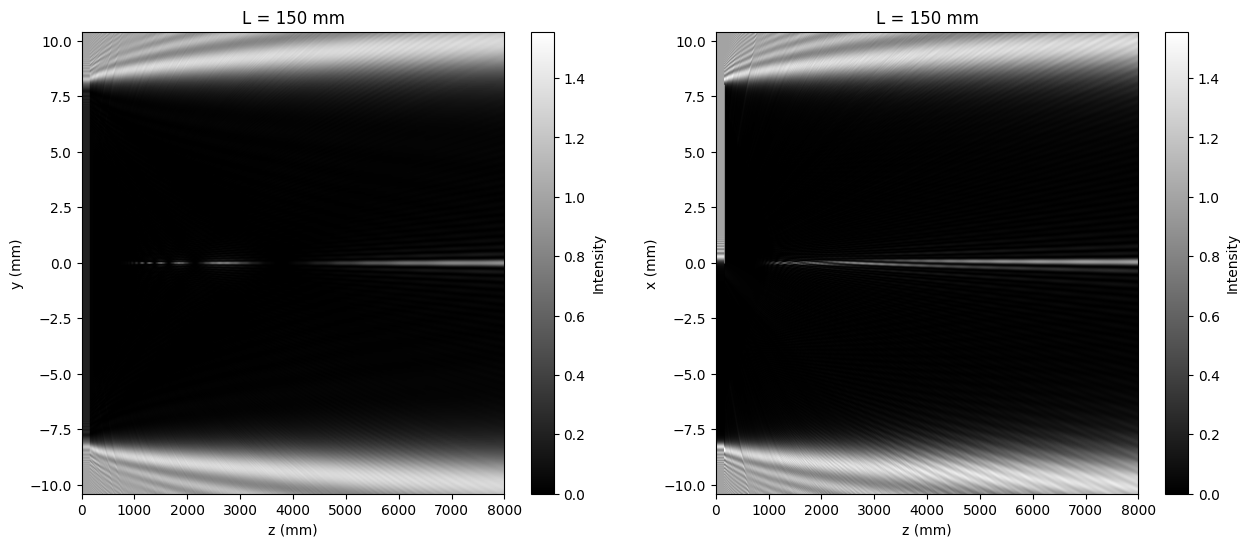

In [10]:
from matplotlib.animation import FuncAnimation, FFMpegWriter

plt.rcParams['animation.ffmpeg_path'] = 'C:\\Program Files\\ffmpeg\\bin\\ffmpeg.exe'

# Sample data (replace ZZY, LL, AA, and GG with your actual data)
num_frames = 10

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Initialize the first plot with the first frame
img1 = ax1.imshow(ZZY[0], cmap='gray', aspect='auto', extent=[0, z[-1], -1.3*R, 1.3*R])
ax1.set_xlabel('z (mm)')
ax1.set_ylabel('y (mm)')
cbar1 = fig.colorbar(img1, ax=ax1)
cbar1.set_label('Intensity')
title1 = ax1.set_title(f'L = {LL[0]} mm')

# Initialize the second plot with the first frame
img2 = ax2.imshow(ZZX[0], cmap='gray', aspect='auto', extent=[0, z[-1], -1.3*R, 1.3*R])
ax2.set_xlabel('z (mm)')
ax2.set_ylabel('x (mm)')
cbar2 = fig.colorbar(img2, ax=ax2)
cbar2.set_label('Intensity')
title2 = ax2.set_title(f'L = {LL[0]} mm')

# Initialization function: plot the background of each frame
def init():
    img1.set_data(ZZY[0])
    title1.set_text(f'L = {LL[0]} mm')
    img2.set_data(ZZX[0])
    title2.set_text(f' L = {LL[0]} mm')
    return [img1, title1, img2, title2]

# Update function for the animation
def update(frame):
    img1.set_data(ZZY[frame])
    title1.set_text(f'L = {LL[frame]} mm')
    img2.set_data(ZZX[frame])
    title2.set_text(f'L = {LL[frame]} mm')
    return [img1, title1, img2, title2]

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(ZZY)), init_func=init, blit=True, interval=800)

# Save the animation as a GIF or MP4
ani.save('animationTOG.gif', writer='ffmpeg', dpi=500)  # or 'animation.mp4', writer='ffmpeg'
#ani.save('animationTOG.mp4', writer='ffmpeg', dpi=500) 
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


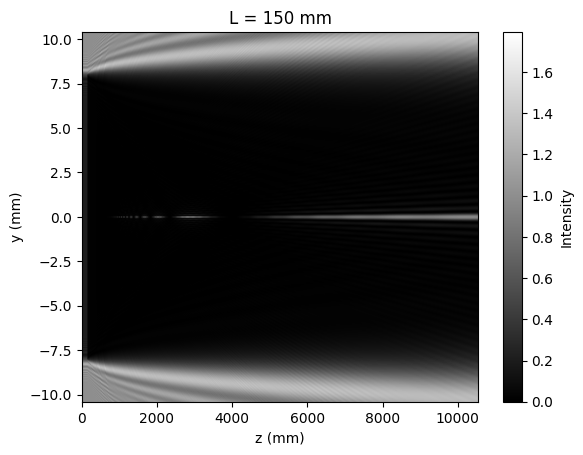

In [58]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()

# Initialize the plot with the first frame
img = ax.imshow(ZZY[0] , cmap='gray', aspect='auto', extent=[0,1300*R+150,-1.3*R,1.3*R])

ax.set_xlabel('z (mm)')
ax.set_ylabel('y (mm)')
# Create a colorbar
cbar = fig.colorbar(img, ax=ax)
cbar.set_label('Intensity')
title = ax.set_title(f'L = {LL[0]} mm')  # Setting the initial title

# Initialization function: plot the background of each frame
def init():
    img.set_data( ZZY[0]  )
    title.set_text(f'L = {LL[0]} mm')  # Initialize the title
    return [img, title]

def update(frame):
    img.set_data(ZZY[frame] )
    title.set_text(f'L = {LL[frame]} mm')  # Update the title
    return [img, title]

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(ZZY)), init_func=init, blit=True,interval = 400)

# Save the animation as a GIF or MP4
ani.save('animation.gif', writer='imagemagick',dpi=500)  # or 'animation.mp4', writer='ffmpeg'

plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


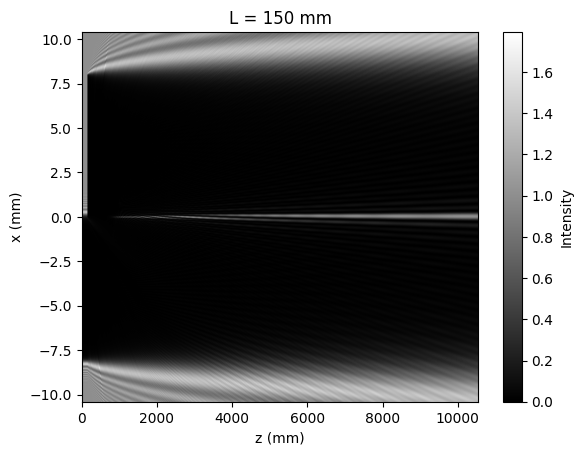

In [60]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()

# Initialize the plot with the first frame
img = ax.imshow(ZZX[0] , cmap='gray', aspect='auto', extent=[0,1300*R+150,-1.3*R,1.3*R])

ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
# Create a colorbar
cbar = fig.colorbar(img, ax=ax)
cbar.set_label('Intensity')
title = ax.set_title(f'L = {LL[0]} mm')  # Setting the initial title

# Initialization function: plot the background of each frame
def init():
    img.set_data( ZZX[0]  )
    title.set_text(f'L = {LL[0]} mm')  # Initialize the title
    return [img, title]

def update(frame):
    img.set_data(ZZX[frame] )
    title.set_text(f'L = {LL[frame]} mm')  # Update the title
    return [img, title]

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(ZZX)), init_func=init, blit=True,interval = 400)

# Save the animation as a GIF or MP4
ani.save('animationX.gif', writer='imagemagick',dpi=500)  # or 'animation.mp4', writer='ffmpeg'

plt.show()